<a href="https://colab.research.google.com/github/jozenerd/fernando.guarin.github.io/blob/master/ENLactApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

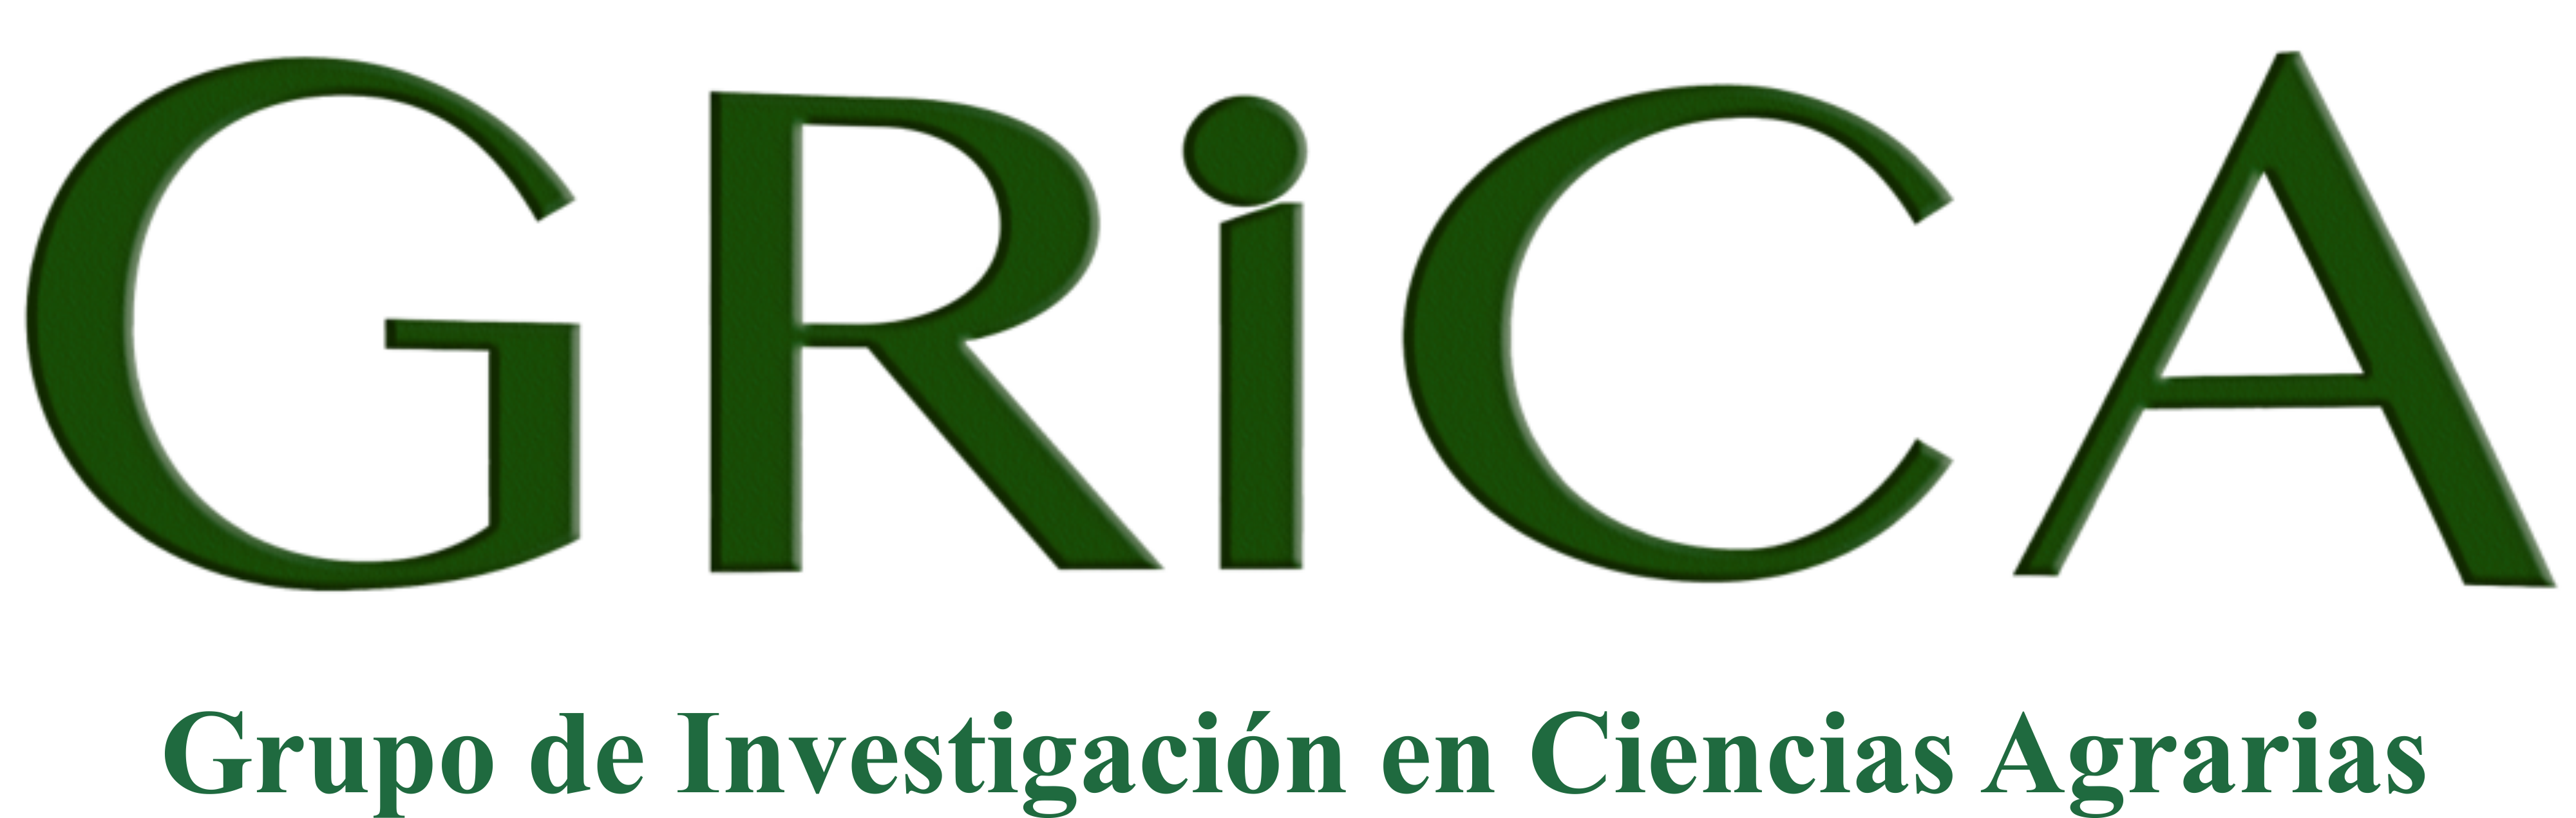

#**ENLactApp**

 **Aplicación para el cálculo de aportes nutricionales en vacas lecheras**

José F. Guarín Montoya, Ph.D.; John F. Ramirez Agudelo, Ph.D.

GrICA, Facultad de Ciencias Agrarias, Universidad de Antioquia



---



## **ENLactApp (con aforo)**
Balance Energetico de Lactancia

Normalmente en nuestra ganadería el mayor limitante es la cantidad de energía suministrada a nuestros animales. Por esto, desarrollamos esta aplicación que busca realizar un cálcuulo rápido de los aportes energéticos provenientes de las fuentes más comunes en nuestra ganadería especializada en leche y de estsa forma calcular el estimado de Litros a producir con base en este suplemento energético.

El uso de herramientas digitales como las aplicaciones para dispositivos electrónicos es del mayor interés de nuestros productores, profesionales y la industria láctea en general. Herramientas para el manejo productivo, en especial para el manejo nutricional son de importancia para nuestra industria láctea en la actualidad. Objetivo: describir el proceso de creación y de desarrollo de una aplicación para el cálculo de los aportes nutricionales que reciben vacas lecheras específicamente en el medio. Para el desarrollo de la aplicación se utilizó Google Colab. El lenguaje de programación usado dentro del programa Python. En la aplicación la primera escena es la de ingreso de datos básicos, en donde se encuentran formularios para ingreso de información para las variables Nombre de la finca, Ubicación, Fecha y otros detalles. Así mismo se encuentran menús desplegables para el tipo de pasto predominante, Tipo de suplementación, Distancia al ordeño. El último componente de esta lista es un Slider que permite introducir los días para la rotación (rango de 20-40 d). La escena dos (Con aforo) recibe las variables introducidas en la escena ingreso de datos básicos a través del uso del public class DontDestroy, que es cargado en el void Awake, lo que garantiza que las variables estén disponibles para los cálculos en la escena dos. Al usuario introducir el consumo en base fresca para cada componente de la dieta de las vacas, la aplicación calcula automáticamente para cada componente, la materia seca (MS) estimada, el consumo de MS en Kg, la energía neta de lactancia (ENl). Una vez calculados los aportes, la aplicación calcula automáticamente, con base a las formulas de la NRC 2001 para ganado de leche, los siguientes parámetros: Total ENl, Energía mantenimiento, Energía para caminar y para pastoreo, ENl disponible para producción, la leche potencial a ser producida y los Litros de leche por Kg de concentrado consumido. Conclusiones: la app para el cálculo automatizado de aportes energéticos posibilita la eficiente estimación de la energía de producción en lecherías especializadas. 


**Palabras clave:** android, ios, leche, nutrición.

**Datos de la vaca**
Este paso lo podemos usar para refinar la app cuando ya esté andando bien, asi se elimina la necesidad de meter muchos datos de entrada y se lilita a meter el tipo de pasto y el suplemento que está dando

In [1]:
Peso = input('Peso de la vaca en kg: ')
TipoPasto = input("Selecccione el pasto, Kikuyo, RyeGrass u otro: ")

#NivelAct=  #bajo (EMant*.1), medio (EMant*.3)  o alto (EMant*.5)

#TipoSuplemento= Ensilaje de maiz, Ensilaje de naranja, ensilaje de boton

Peso de la vaca en kg: 580
Selecccione el pasto, Kikuyo, RyeGrass u otro: RyeGrass


Aportes del pasto

In [2]:
kgBFPasto=90 #introduzca la cantidad de pasto en kg de FV
MSPasto=.14    #introduzca la MS del pasto %
ENlPasto=1.1   #introduzca el contenido de Energía Neta de lactancia del pasto
ConskgMSPasto=kgBFPasto*MSPasto #resultado del consumo de pasto en MS
AportreENlPasto=round(kgBFPasto*MSPasto*ENlPasto,1) #resultado ENL del pasto

Aportes del concentrado

In [3]:
kgBFConcentrado=8  #introduzca la cantidad de Concentrado en kg de FV
MSConcentrado=.88   #introduzca la MS del Concentrado %
ENlConcentrado=1.8   #introduzca el contenido de Energía Neta de lactancia del Concentrado
ConskgMSConcentrado=kgBFConcentrado*MSConcentrado #resultado del consumo de Concentrado en MS
AportreENlConcentrado=round(kgBFConcentrado*MSConcentrado*ENlConcentrado,1) #resultado ENL del Concentrado

Aportes del suplemento

In [4]:
kgBFSuplemento=7  #introduzca la cantidad de Suplemento en kg de FV
MSSuplemento=.35    #introduzca la MS del Suplemento %
ENlSuplemento=1.3   #introduzca el contenido de Energía Neta de lactancia del Suplemento
ConskgMSSuplemento=kgBFSuplemento*MSSuplemento #resultado del consumo de Suplemento en MS
AportreENlSuplemento=round(kgBFSuplemento*MSSuplemento*ENlSuplemento,1) #resultado ENL del Suplemento

## Suma de las energías

In [6]:
TotalENl=round(AportreENlPasto+AportreENlConcentrado+AportreENlSuplemento,1) #suma de las energias individuales
#EMant=9.8
  # el condicional de la tabla IF(AND(Peso>=400,Peso<=450),(7.16-((450-Peso)*(7.82-7.16))/(450-400)),IF(AND(Peso>=450,Peso<=500),(8.46-((500-Peso)*(8.46-7.82))/(500-450)),IF(AND(Peso>=500,Peso<=550),(9.09-((500-Peso)*(9.09-8.46))/(550-500)),IF(AND(Peso>=550,Peso<=600),(9.7-((600-Peso)*(9.7-9.09))/(600-550)),IF(AND(Peso>=600,Peso<=650),(10.3-((650-Peso)*(10.3-9.7))/(650-600)),IF(AND(Peso>=650,Peso<=700),(10.89-((700-Peso)*(10.89-10.3))/(700-650)),IF(Peso>700,10.89,0)))))))
  #,,IF(Peso>700,10.89,0)))))))

if int(Peso)>=400 and int(Peso)<=450:
  EMant=(7.16-((450-int(Peso))*(7.82-7.16))/(450-400))
if int(Peso)>=450 and int(Peso)<=500:
  EMant=(8.46-((500-int(Peso))*(8.46-7.82))/(500-450))
if int(Peso)>=500 and int(Peso)<=550:
  EMant=(9.09-((550-int(Peso))*(9.09-8.46))/(550-500))
if int(Peso)>=550 and int(Peso)<=600:
  EMant=(9.7-((600-int(Peso))*(9.7-9.09))/(600-550))
if int(Peso)>=600 and int(Peso)<=650:
  EMant=(10.3-((600-int(Peso))*(10.3-9.7))/(650-600))
if int(Peso)>=650 and int(Peso)<=700:
  EMant=(10.89-((700-int(Peso))*(10.89-10.3))/(700-650))
if int(Peso)==700:
  EMant=10.89

EMantAct=EMant*0.3
  #la podemos ajustar con los datos de la vaca por actividad
EPdn=round(TotalENl-EMant-EMantAct,1) #energia que sobra para producir
ENlLitro=0.69 
LechePotencial=EPdn//ENlLitro
print(EMant)


9.456


Impresión de resultados

In [ ]:
print(AportreENlPasto, "Mcal ENl Pasto")
print(AportreENlConcentrado, "Mcal ENl Conc.")
print(AportreENlSuplemento, "Mcal ENl Supl.")
print(TotalENl, "Mcal ENl Totales")
print(EPdn, "ENl para leche")
print(LechePotencial, "L leche")

13.9 Mcal ENl Pasto
12.7 Mcal ENl Conc.
3.2 Mcal ENl Supl.
29.8 Mcal ENl Totales
17.1 ENl para leche
24.0 L leche




---



# ENLactApp (para hayar el Consumo estimado de pasto)

La determinación del consumo real de forraje verde es un dato de suma importancia en las fincas lecheras. Sin embargo, para la determinación del consumo se emplean técnicas difíles de implementar y que, en algunos casos, presentan una serie de imprecisiones. La técnica para estimar el consumo de pasto a través de la producción de leche total se basa en el concepto de las sumas de aportes energéticos individuales de cada pastura y la determinación de los requerimientos para producción basada en las ecuaciones de la NRC.

Al usuario introducir el consumo en base fresca para cada componente de la dieta de las vacas, la aplicación calcula automáticamente para cada componente, la materia seca (MS) estimada, el consumo de MS en Kg, la energía neta de lactancia (ENl). Una vez calculados los aportes, la aplicación calcula automáticamente, con base a las formulas de la NRC 2001 para ganado de leche, los siguientes parámetros: Total ENl, Energía mantenimiento, Energía para caminar y para pastoreo, ENl disponible para producción, la leche potencial a ser producida y los Litros de leche por Kg de concentrado consumido. Conclusiones: la app para el cálculo automatizado de aportes energéticos posibilita la eficiente estimación de la energía de producción en lecherías especializadas. Palabras clave: android, ios, leche, nutrición.

Datos de Producción y consumo 

In [12]:
LecheReal=36          #dato inicial para poder calcular el consumo de pasto
ConsumoConcentrado=8  #consumo real de concentrado
ConsumoSuplemento=4   #kg reales de suplemento suministrado
Pasto2="ryegrass" # kikuyo, ryegrass, otro

Calculos de aportes y demandas

In [13]:
AportreENlConcentrado2=round(ConsumoConcentrado*.88*1.8,1)
AportreENlSuplemento2=round(ConsumoSuplemento*MSSuplemento*ENlSuplemento,1) #resultado ENL del Suplemento
EPdn2=round(LecheReal*.69,1)
Etotal=round(EPdn2+9.8+(9.8*.3),1)
ENlPasto2=round(Etotal-AportreENlConcentrado2-AportreENlSuplemento2,1)

if Pasto2=="kikuyo":
  kgBFPastoCalculado=round(ENlPasto2/1.12/.16,1)
if Pasto2=="ryegrass":
  kgBFPastoCalculado=round(ENlPasto2/1.4/.16,1)
else:
  kgBFPastoCalculado=round(ENlPasto2/1.28/.16,1)

In [14]:
print(AportreENlConcentrado2, "Mcal ENl Conc.")
print(AportreENlSuplemento2, "Mcal ENl Supl." )
print(EPdn2, "Mcal ENl Producción")
print(Etotal, "Mcal ENl Total.")
print(ENlPasto2, "Mcal ENl Pasto")
print(kgBFPastoCalculado, "Kg Pasto en FV" )

12.7 Mcal ENl Conc.
1.8 Mcal ENl Supl.
24.8 Mcal ENl Producción
37.5 Mcal ENl Total.
23.0 Mcal ENl Pasto
102.7 Kg Pasto en FV
